In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

In [2]:
# Loading dataset
data = pd.read_csv(r'C:\Users\Kruti Agrawal\Desktop\Projects\heart_disease\Heart Disease\dataset.csv')  
print(data.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [3]:
# Checking for missing values
print(data.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [4]:
# Statistical summary
print(data.describe())

               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636     

In [5]:
# Separating features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Defining the model
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)

Epoch 1/50
96/96 [==============================] - 1s 3ms/step - loss: 0.6287 - accuracy: 0.6513 - val_loss: 0.4930 - val_accuracy: 0.8067
Epoch 2/50
96/96 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8162 - val_loss: 0.3985 - val_accuracy: 0.8277
Epoch 3/50
96/96 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8288 - val_loss: 0.3709 - val_accuracy: 0.8403
Epoch 4/50
96/96 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8393 - val_loss: 0.3544 - val_accuracy: 0.8613
Epoch 5/50
96/96 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8519 - val_loss: 0.3411 - val_accuracy: 0.8697
Epoch 6/50
96/96 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8613 - val_loss: 0.3341 - val_accuracy: 0.8824
Epoch 7/50
96/96 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.8666 - val_loss: 0.3250 - val_accuracy: 0.8908
Epoch 8/50
96/96 [==

In [10]:
# Evaluating on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

8/8 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.9118
Test Accuracy: 0.9117646813392639


In [11]:
# Classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       107
           1       0.91      0.93      0.92       131

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238



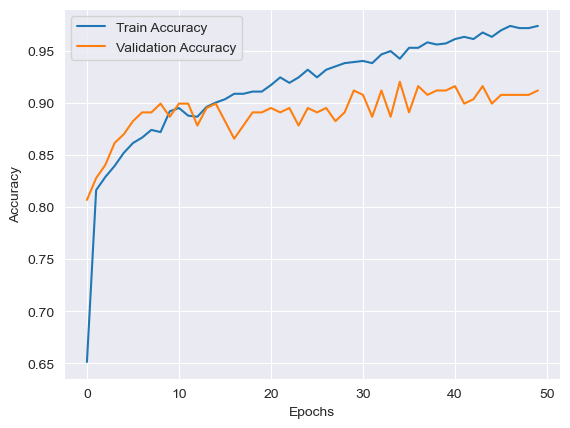

In [12]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model.save('heart_disease_model.h5')
joblib.dump(scaler, 'scaler.pkl')

C:\Users\Kruti Agrawal\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.pkl']